<div style="background-color: #d8eafd; color: #1a1a1a; padding: 15px; border-radius: 8px; border: 1px solid #b3cde0; text-align: center;">
    <h2 style="margin-top: 0;">Markov Chain Monte Carlo (MCMC): Concepts and Applications</h2>
    <p style="font-size: 1.1em; font-weight: bold; text-align: center;">Author: Ritwik Mandal</p>
    <p style="font-size: 1em; text-align: center; color: #333; margin-top: 2px;">
        Reach out via email: <a href="mailto:mailme.ritwikmandal99@gmail.com" style="color: #0066cc; text-decoration: underline;">mailme.ritwikmandal99@gmail.com</a>
    </p>
</div>

# Introduction

This notebook explores key methods for probabilistic sampling and inference, progressing from **Monte Carlo methods** to **Markov Chains** and finally to **Markov Chain Monte Carlo (MCMC)** techniques. 

Monte Carlo methods provide a way to estimate quantities based on random sampling, useful for problems that are otherwise analytically intractable. Markov Chains introduce the concept of memoryless processes, where future states depend only on the present state, not on the sequence of events that preceded it. 

Combining these two concepts, MCMC methods like **Metropolis-Hastings** enable efficient sampling from complex probability distributions, especially when direct sampling is difficult. This notebook demonstrates how MCMC algorithms can generate samples that approximate target distributions by constructing a Markov Chain whose stationary distribution is the target.

These techniques will be demonstrated step-by-step, culminating in an application of MCMC for sampling from an unknown distribution.


# Monte Carlo Method 

A definition of a **Monte Carlo Method** would be one that involves deliberate use of random numbers in a calculation that has the structure of a stochastic process. By stochastic process, we mean a sequence of states whose evolution is determined by random events. In simple words, it can be said that Monte-Carlo is a probabilistic method of solving nonprobabilistic problems. Named after the famous Monte Carlo Casino in Monaco, this method uses repeated random sampling to approximate solutions to complex mathematical and physical problems.
#### Historical background 
The Monte Carlo Method was pioneered by scientists working on the **Manhattan Project** during World War II. The key concept of Monte Carlo Method began in the 1940s with contributions from Stanislaw Ulam, John von Neumann, Enrico Fermi and Nicholas Metropolis working together in Los Alamos. The method was formalized by mathematician **Ulam** and physicist **von Neumann** as they worked on neutron diffusion problems for development of nuclear weapons. Ulam, inspired by a solitaire card game, realized that random sampling could be a powerful tool for estimating complex probabilities and integrals. With von Neumann’s help, they developed algorithms that harnessed randomness to approximate these quantities, laying the groundwork for the Monte Carlo Method. A mathematician and computer scientist, **Metropolis** contributed significantly to develope and optimize the algorithms behind the method. It was Metropolis who coined the name **“Monte Carlo”** for this technique, a playful nod to the famous Monte Carlo Casino and its associations with chance and probability.

#### Example of Monte Carlo Method for solving deterministic problems using randomness

**Calculating the value of π** using the Monte Carlo Method is a classic example that demonstrates the power of randomness to approximate mathematical constants. 
Imagine a unit square with an inscribed quarter-circle of radius 1. By randomly generating points within the square, we can determine the proportion of points that fall inside the quarter-circle. This proportion approximates the ratio of the area of the quarter-circle to the area of the square. Since the area of the quarter-circle is given by $\frac{\pi}{4}$, we can use this ratio to estimate π :

$$
\pi \approx 4 \times \frac{\text{points in quarter-circle}}{\text{total points in square}}
$$

In [3]:
import os
import math
import numpy as np
import threading
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

In [15]:
points_info = {} # declaring a global variable to store data for plotting later

def pi_estimate(iteration):
    x = np.random.uniform(0, 1, iteration)
    y = np.random.uniform(0, 1, iteration)
    points_inside_circle = ( x**2 + y**2 ) <= 1 #creates a boolean array subjected to the condition
    point_count_inside = np.cumsum(points_inside_circle) #creating an array to see the calculated value of pi after each iteration
    pi_estimated = 4 * point_count_inside/np.arange(1, iteration+1)
    
    global points_info
    points_info = {'x' : x , 'y' : y, 'points_inside' : points_inside_circle }
    return pi_estimated

iter = 50000
estimated_pi = pi_estimate(iter)
print(f'The estimated value of pi after {iter} iterations is', estimated_pi[-1])

The estimated value of pi after 50000 iterations is 3.1436


Let's try to visualise the simulation more carefully through iterations and get a feel of the randomness at play

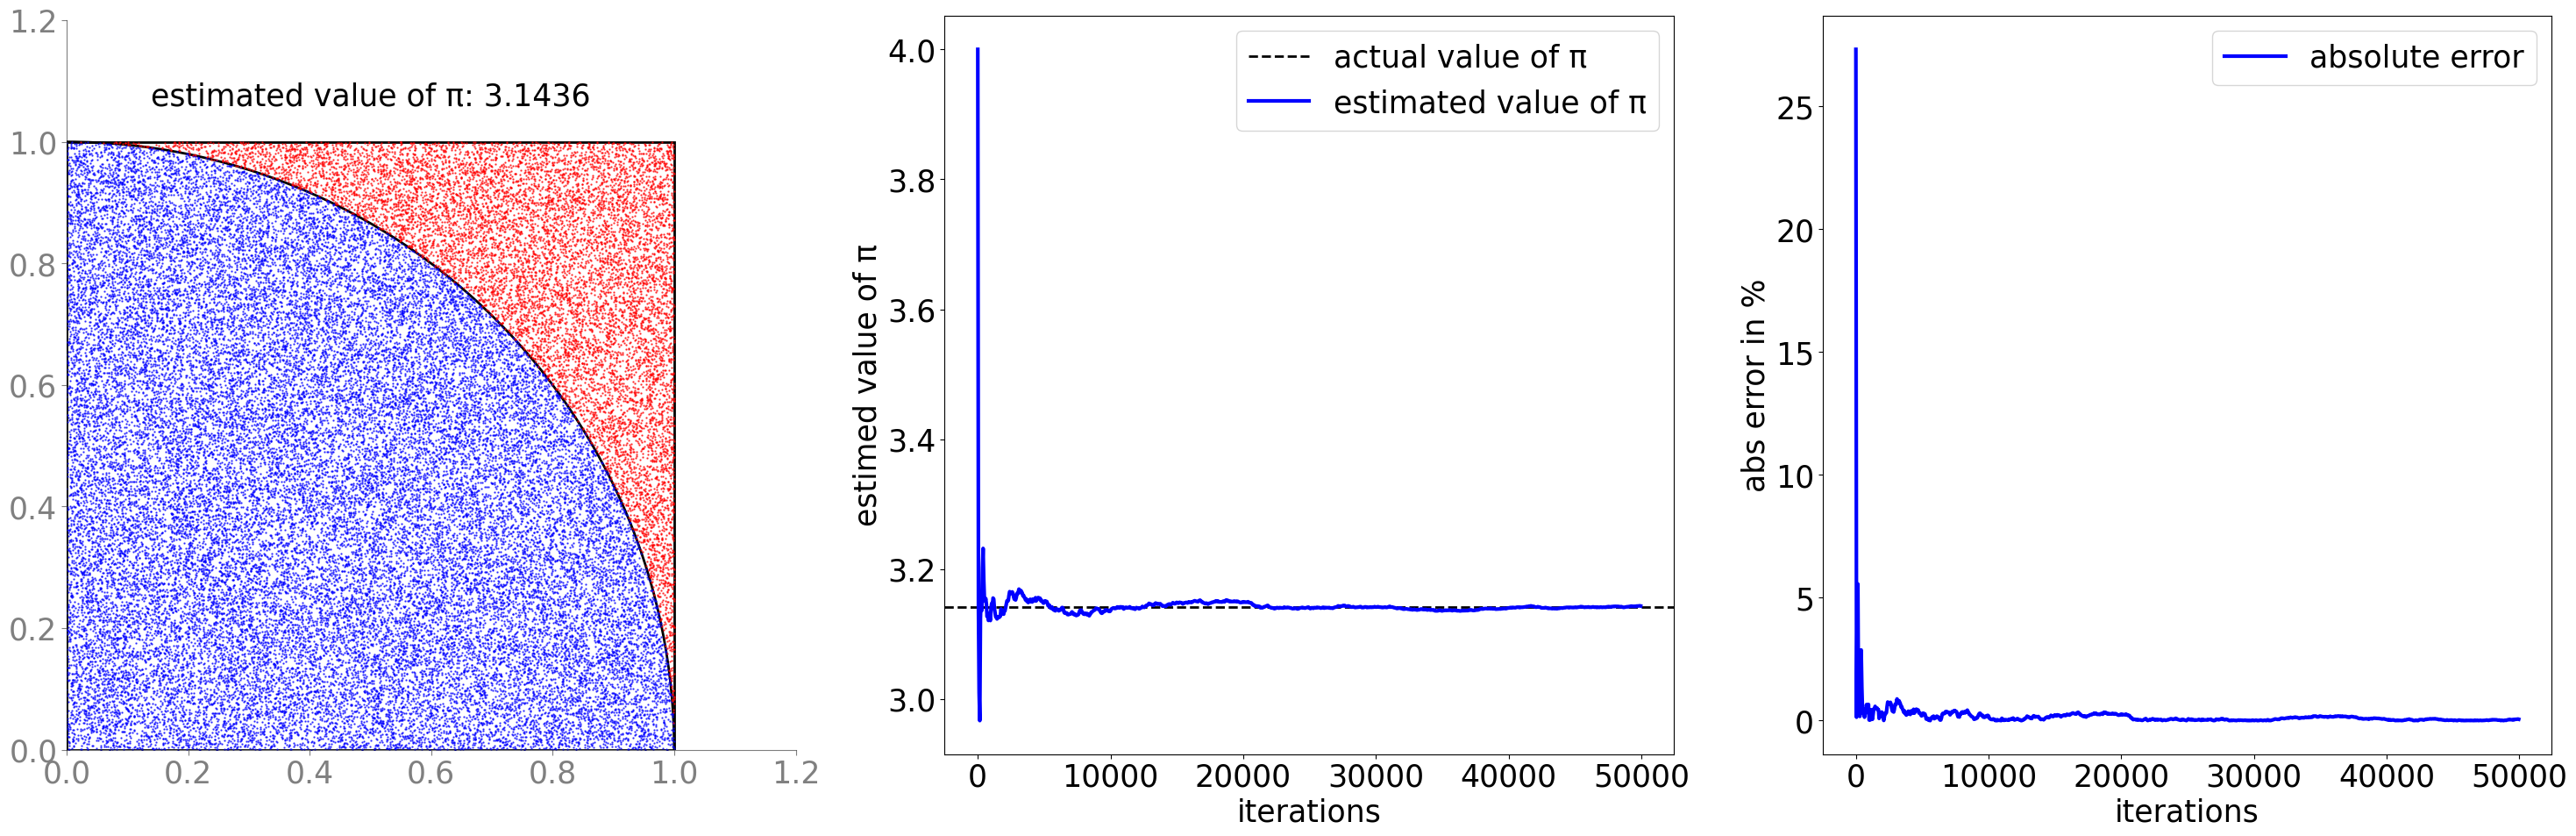

In [17]:
def plot_pi_estimate(show_animation=False):   
    x = points_info['x']
    y = points_info['y']
    points_inside = points_info['points_inside']
    plt.rc('font', size = 25)
    
    fig, ax = plt.subplots(1, 3, figsize=(30,10))   
    ax[0].set_aspect('equal')
    ax[0].set_xlim(0, 1.2)
    ax[0].set_ylim(0, 1.2)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_color((0, 0, 0, 0.5))
    ax[0].spines['bottom'].set_color((0, 0, 0, 0.5))
    ax[0].tick_params(axis='both', colors='gray', size=4)  # Change tick color and size

    
    circle = plt.Circle((0, 0), 1, edgecolor='k', facecolor='none',linewidth = 2)
    ax[0].add_patch(circle)
    square = patches.Rectangle((0, 0), 1, 1, edgecolor='k', facecolor='none', linewidth = 2)
    ax[0].add_patch(square)
    
    if show_animation:
        print('The function of showing animation is yet to be added')  
    else:
        ax[0].scatter(x[points_inside], y[points_inside], color='blue', s=0.5, alpha = 0.7)
        ax[0].scatter(x[~points_inside], y[~points_inside], color='r', s=0.5, alpha = 0.7)
        ax[0].text(0.5, 1.05, f'estimated value of π: {estimated_pi[-1]:.4f}', ha='center', va='bottom', fontsize=25)

   #plotting the estimated value of pi after each 100 iterations
    iter_arr = np.arange(1,iter+1, 50)
    ax[1].axhline(y=np.pi, color = 'k', linestyle ='--', linewidth= 2, label='actual value of π')
    ax[1].plot(iter_arr, estimated_pi[::50], 'b-', linewidth = 3,  label = 'estimated value of π')
    ax[1].set_ylabel('estimed value of π')
    ax[1].set_xlabel('iterations')
    ax[1].legend()
   
    #plotting absolute error after each 100 iterations                     
    pi_arr = np.pi*np.ones_like(estimated_pi)
    per_error = (abs(estimated_pi - pi_arr)/ pi_arr)*100
    ax[2].plot(iter_arr, per_error[::50], 'b-', linewidth = 3, label = 'absolute error')
    ax[2].set_ylabel('abs error in %')
    ax[2].set_xlabel('iterations')
    ax[2].legend()

    plt.tight_layout()
    plt.show()

plot_pi_estimate(show_animation = False)

As expected we can see as the iteration increases the value of pi becomes closer to the actual value and the absolute error also decreases. After few iterations the value of absolute error sharply decreases and then becomes somewhat stable. Now let's take a closer look at the last 5000 iterations to understand this somewhat stable state.

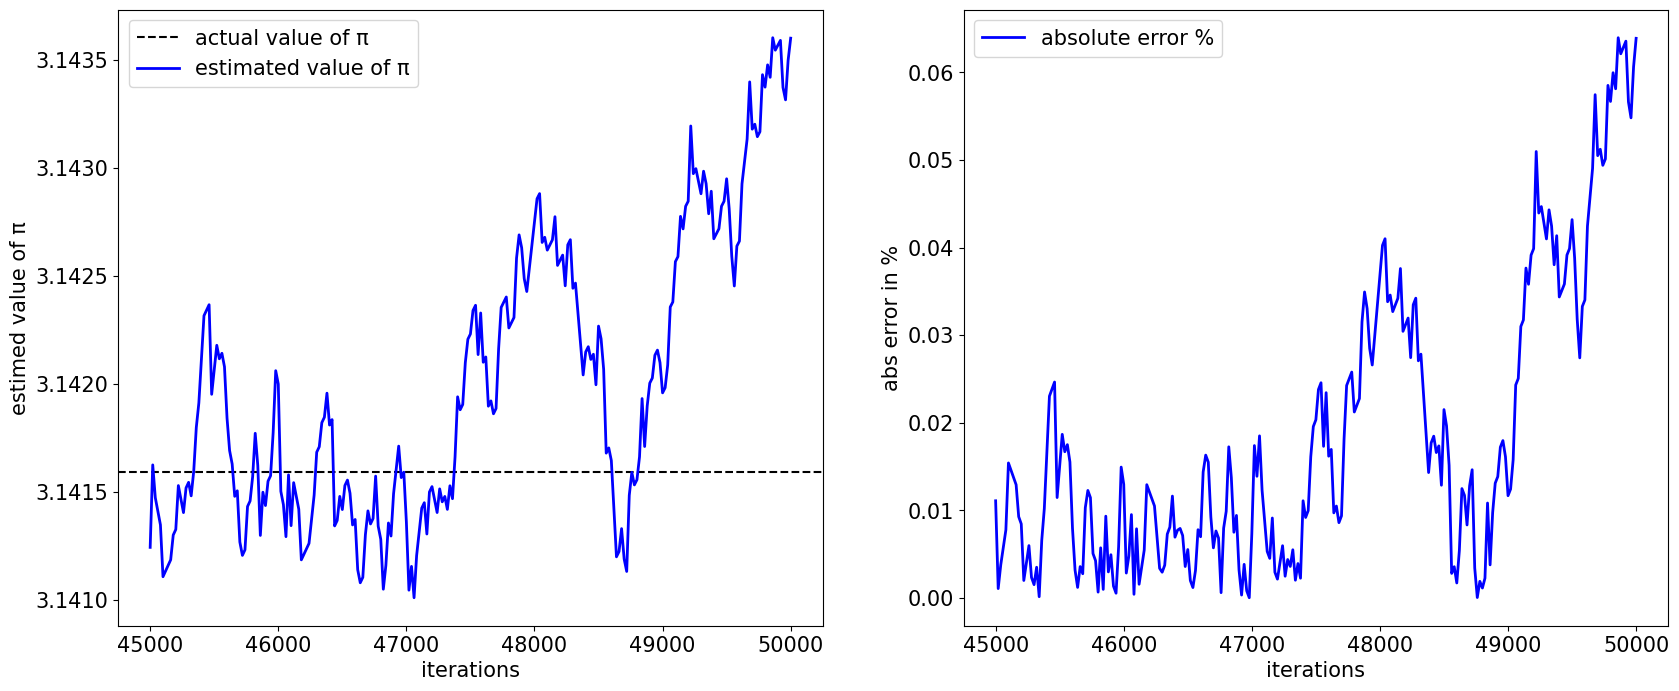

In [19]:
last_iters = np.arange(iter-5000,iter+1, 20)
plt.rc('font', size = 15)
fig, ax = plt.subplots(1,2,figsize= (20,8))

ax[0].axhline(y=np.pi, color = 'k', linestyle ='--', label='actual value of π')
ax[0].plot(last_iters, estimated_pi[-5001::20], 'b-', linewidth = 2,  label = 'estimated value of π')
ax[0].set_ylabel('estimed value of π')
ax[0].set_xlabel('iterations')
ax[0].legend()
                        
pi_arr = np.pi*np.ones_like(estimated_pi)
per_error = (abs(estimated_pi - pi_arr)/ pi_arr)*100
ax[1].plot(last_iters, per_error[-5001::20], 'b-', linewidth = 2, label = 'absolute error %')
ax[1].set_ylabel('abs error in %')
ax[1].set_xlabel('iterations')
ax[1].legend()

plt.show()

By examining the final few iterations, we notice that the estimated value of pi fluctuates around the true value. This variability is due to the inherent randomness in the Monte Carlo simulation, where each estimate depends on the specific set of random samples generated. Consequently, the final value of pi may differ slightly depending on the number of iterations we choose to stop at. While this randomness introduces some variability, it's not a drawback in principle; rather, it reflects the essence of Monte Carlo methods.

However, due to the stochastic nature of the algorithm, running the Monte Carlo simulation multiple times will yield slightly different estimates each time, as shown below :- 

In [21]:
for i in range(11):
    est_pi = pi_estimate(iteration=50000)
    print(f'The value of pi after {i} iteration is', est_pi[-1])

The value of pi after 0 iteration is 3.13344
The value of pi after 1 iteration is 3.14752
The value of pi after 2 iteration is 3.12544
The value of pi after 3 iteration is 3.1364
The value of pi after 4 iteration is 3.13584
The value of pi after 5 iteration is 3.15672
The value of pi after 6 iteration is 3.14648
The value of pi after 7 iteration is 3.14384
The value of pi after 8 iteration is 3.13152
The value of pi after 9 iteration is 3.14568
The value of pi after 10 iteration is 3.14488


As discussed above, it is very difficult to get a stable estimation of pi due to randomness at play. If we take the mean of a very long Monte Carlo process the mean should converge to pi. However, in a single, long Monte Carlo process, randomness can lead to temporary streaks or clusters that skew the result. By running multiple independent simulations and averaging their outcomes, we reduce the impact of these random fluctuations, resulting in a more stable and accurate final estimate. Averaging the outcomes of independent runs also reduces the impact of any single simulation that might be biased by a particular random sampling pattern, leading to a more robust estimate.

We can leverage the power of multi-threading / parallel processing to run one monte carlo expirement in one thread to get the result faster

In [23]:
available_threads = max(1, os.cpu_count()-2) # keeping 2 threads free to accommodate normal tasks for the PC

max_iter = 1000 # total numbers of monte carlo simulations 
iter_monte_carlo = 15000 # number of trials in a single monte-carlo simulation
result_pi_values = np.zeros((max_iter, iter_monte_carlo))

# A target function for saving results from different threads row-wise
def threading_process(row):
    result_pi_values[row, :] = pi_estimate(iter_monte_carlo)

threads = []
for simulation in range(max_iter):
    thread = threading.Thread(target=threading_process, args=(simulation,))
    threads.append(thread) 
    thread.start()
    
    if len(threads) >= available_threads:
        for t in threads:
            t.join() # waits for the threads to finish one simulation
        threads = []

for t in threads:
    t.join() #  ensures all simulations are finished

mean_pi = (result_pi_values.flatten()).mean()

print(f'The calculated pi using all the simulations is {mean_pi:.5f}')

The calculated pi using all the simulations is 3.14188


By executing the Monte Carlo simulation in the shell above multiple times, we find that the calculated value of pi has stabilizes significantly atleast till two decimal places. This demonstrates the effectiveness of the Monte Carlo method in estimating pi.

Next, let's visualize the distribution of our estimates using a histogram, which will provide insights into the variability and concentration of the calculated values.

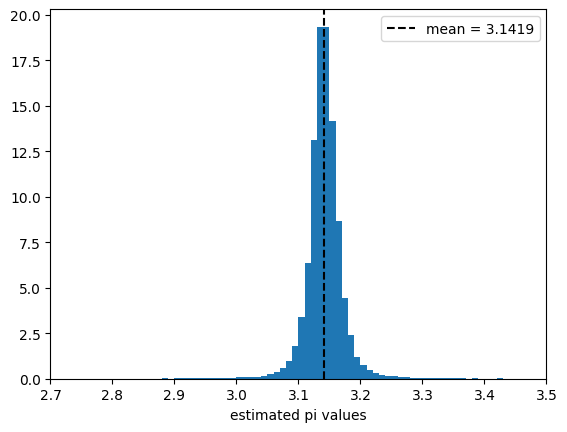

In [25]:
plt.rc('font', size = 10)
plt.hist(result_pi_values.flatten(), bins = 400, density = True)
plt.axvline(mean_pi, color = 'k', linestyle = '--', label = f'mean = {mean_pi:.4f}')
plt.xlabel('estimated pi values')
plt.xlim(2.7,3.5)
plt.legend()
plt.show()

To improve the accuracy of our estimate for pi we observe that in a single Monte Carlo simulation, the estimated value fluctuates significantly during the initial iterations. As the number of iterations increases, these estimates tend to stabilize and converge closer to the true value of pi.

To enhance the reliability of our results, it is beneficial to disregard the estimates obtained during the initial iterations, allowing us to focus on the values once the process has reached closer to pi. By excluding these early samples, we can ensure that our final estimate is based on more representative values, leading to a more accurate approximation of the target distribution.

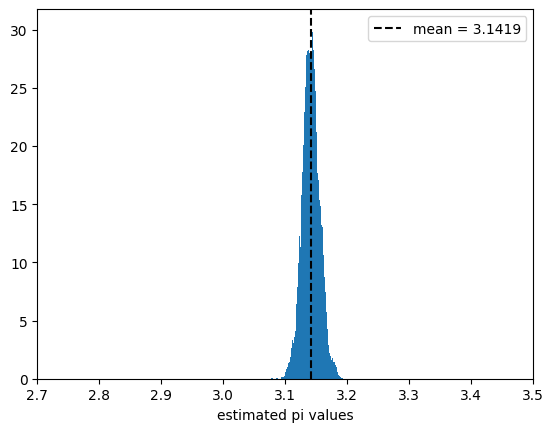

In [27]:
stable_pi_arr = result_pi_values[:,10000:] # discarding the initial 10,000 values of each simulation
stable_mean_pi = (stable_pi_arr.flatten()).mean()

#plotting the historgram
plt.hist(stable_pi_arr.flatten(), bins = 400, density = True)
plt.axvline(stable_mean_pi, color = 'k', linestyle = '--', label = f'mean = {mean_pi:.4f}')
plt.xlabel('estimated pi values')
plt.xlim(2.7,3.5)
plt.legend()
plt.show()

By discarding the estimates from the initial iterations, we observe a clear decrease in the spread of our results in the histogram. However, it’s important to note that the final estimates may still vary due to the inherent randomness of the Monte Carlo method. Depending on these random variations, the calculated values of pi might converge closer to the actual value or in some cases remain unchanged.

#### Another example 

**Definite integral can be estimated** using the Monte Carlo method. To understand how it works, we first recall the definition of the average value of a function $f(x)$ over an interval $[a, b]$:

$$
\langle f(x) \rangle = \frac{1}{b-a} \int_{a}^{b} f(x) \, dx
$$
From this definition, we can rearrange it to express the definite integral in terms of the average value:
$$
\int_{a}^{b} f(x) \, dx = (b-a) \langle f(x) \rangle
$$
The Monte Carlo method approximates the average value $ \langle f(x) \rangle $ by randomly sampling points  $x_i$ in the interval $[a, b]$ and evaluating the function at these points. Specifically, if we take $N$ random samples $x_1, x_2, \ldots, x_N $ uniformly distributed over $ [a, b]$, the average value can be estimated as:
$$
\langle f(x) \rangle \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$
Substituting this approximation back into the expression for the definite integral gives us:
$$
\int_{a}^{b} f(x) \, dx \approx (b-a) \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$
This method is particularly useful for high-dimensional integrals or when the function $f(x)$ is difficult to integrate analytically. By increasing the number of samples $N$, we can improve the accuracy of our approximation due to the Law of Large Numbers, which states that as $N$ increases, the sample mean converges to the expected value.

We will try to solve the gaussian intergral using Monte Carlo Method which doesn't have a proper way to solve analytically
$$
\int_0^1 e^{-x^2} dx
$$

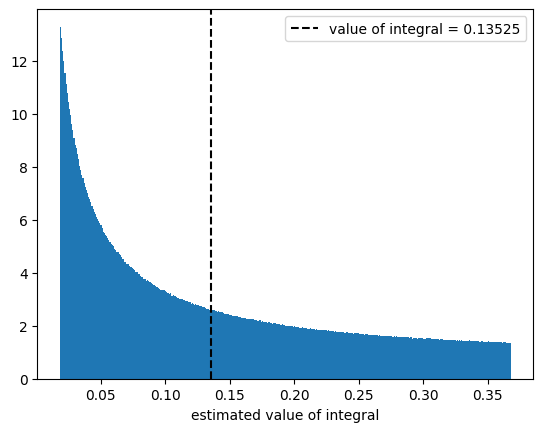

estimated integral of the function is 0.13525
actual value of the integral is 0.13526


In [5]:
def gaussian(x):
    return np.exp(-x**2) 
'''
We basically have to calculate the mean of function f(x) over the randomly sampled points.
We will calculate the mean of several monter carlo simulation (as discussed earlier) later to have more reliable estimation.
Thus the function monte_carlo_intergral will only return the array containing the value of funtion.
'''

def monte_carlo_integral(iteration, lower_limit, upper_limit, func):
    x = np.random.uniform(lower_limit, upper_limit, iteration)
    return func(x)

a = 1 #lower limit of integration
b = 2 #upper limit of integration

max_iter = 1000 # total number of monte carlo simulation
iter_monte_carlo = 15000 # iteration of each monte carlo method

result_integral = np.zeros((max_iter, iter_monte_carlo))

# multi-threading
available_threads = max(1, os.cpu_count()-2)
def threading_process(row):
    result_integral[row,:] = monte_carlo_integral(iter_monte_carlo,a,b, gaussian)

threads =[]

for simulation in range(max_iter):
    thread = threading.Thread(target = threading_process, args = (simulation,))
    threads.append(thread)
    thread.start()
    
    if len(threads) >= available_threads:
        for t in threads:
            t.join()
        threads = []
for t in threads:
    t.join()


mean_of_func =  (result_integral.flatten()).mean()
integral = (b-a) * mean_of_func
actual_integral = math.sqrt(math.pi) * (math.erf(b)- math.erf(a))/2

plt.hist((result_integral.flatten()) * (b-a), bins = 400, density = True)
plt.axvline(integral, color = 'k', linestyle = '--', label = f'value of integral = {integral:.5f}')
plt.xlabel('estimated value of integral')
plt.legend()
plt.show()

print(f'estimated integral of the function is {integral:.5f}')
print(f'actual value of the integral is {actual_integral:.5f}')


# Markov Chain 

A **Markov Chain** is a stochastic model describing a sequence of events in which the probability of each event depends only on the state attained in the previous event. In mathematical terms, a Markov Chain $(E)$ is a sequence of random variables $X_1, X_2, X_3, \dots,$ where $X_n \in E$, with the **Markov Property**, which states that the future state depends only on the present state and not on the past states. 

Mathematically, this property is expressed as:

$$
P(X_{n+1} = x \mid X_n = x_n, X_{n-1} = x_{n-1}, \dots, X_1 = x_1) = P(X_{n+1} = x \mid X_n = x_n)
$$

The random variables $X_n \in E$ are known as states of the chain.
In simpler terms, the probability of moving to the next state $ X_{n+1} $ depends only on the current state $X_n$, not on the sequence of events that preceded it.

#### Transition Matrix

A **transition matrix** $P$ governs the probabilities of moving from one state to another in a Markov Chain. If we have a Markov Chain with states $S = \{ s_1, s_2, \dots, s_k \}$, the transition matrix $P$ is a $k \times k$ matrix where each entry $P_{ij}$ represents the probability of transitioning from state $s_i$ to state $s_j$:

$$
P =
\begin{bmatrix}
P_{11} & P_{12} & \dots & P_{1k} \\
P_{21} & P_{22} & \dots & P_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
P_{k1} & P_{k2} & \dots & P_{kk} \\
\end{bmatrix}
$$

Each row in this matrix sums to 1, as each represents the total probability distribution of moving out of a given state.

<br>
<br>

#### Example

Let's look at some examples of Markov chains over a countable space.

**Example 1 :** Markov chain with only two state in $E = \{ 0,1 \}$
<center>
<img src="Images/Markov.png" width="500" height="400"> 
</center>
We are given that the probability of transitioning from **State 0 to State 1** is $p$, and the probability of transitioning from **State 1 to State 0** is also $p$. The remaining probabilities (self-transitions) are $1 - p$.

Let the **transition probabilities** be as follows:

- $P(0 \to 0) = 1 - p$: The probability of staying in State 0.
- $P(0 \to 1) = p$: The probability of transitioning from State 0 to State 1.
- $P(1 \to 0) = p$: The probability of transitioning from State 1 to State 0.
- $P(1 \to 1) = 1 - p$: The probability of staying in State 1.


The **transition matrix** $P$ for this two-state Markov Chain can be written as:

$$
P = \begin{pmatrix}
1 - p & p \\
p & 1 - p
\end{pmatrix}
$$

Where:
- The first row corresponds to the transitions from State 0.
- The second row corresponds to the transitions from State 1.
- The columns correspond to the states the system may transition to (State 0 and State 1).

This matrix represents the probabilities of moving from one state to another in one step.
<br>
<br>
**Example 2 :** In this example, we model a **Random Walk** on the states $1, 2, 3, \dots$. The system starts in one of the states, and at each step, it transitions to one of its neighboring states (or the end states stays in the same state) with certain probabilities. 
<center>
<img src="Images/MarkovN.png" width="700" height="500"> 
</center>

- For state $n \geq 1$:
  - $P(n \to n-1) = 1 - p$ (move to the previous state)
  - $P(n \to n+1) = p$ (move to next state)


The **transition matrix** \( P \) for the first few states looks like this:

$$
P = \begin{pmatrix}
1 - p & p & 0 & 0 & \dots \\
1 - p & 0 & p & 0 & \dots \\
0 & 1 - p & 0 & p & \dots \\
0 & 0 & 1 - p & 0 & p & \dots \\
\vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix}
$$
<br>
<br>
#### Modelling system with stochastic processes using Markov Chain 

First we will start with a very simple example. Weather forecasting often uses stochastic models, which incorporate random variables to simulate the likelihood of different weather scenarios. A weather system can be modeled as a Markov chain by considering the current weather state and the probability of transitioning to the next weather state. Lets set up a simple markov chain for predicting the weather:
<center>
    <img src="Images/Weather.png" width="400" height="100">
</center>

In [114]:
def simulate_weather(initial_state, days, transition_matrix):
    states = {'rainy':0, 'sunny':1, 'cloudy':2}
    weather_chain = [initial_state]
    for i in range(days):
        next_state = np.random.choice([0,1,2], p=transition_matrix[states[weather_chain[-1]]])
        state_name = list(states.keys())[next_state]
        weather_chain.append(state_name)
    return weather_chain

P = np.array([[0.6, 0.1, 0.3],[0.2,0.7,0.1],[0.5,0.2,0.3]]) #transition_matrix for the example above

#weather_forecast

print(simulate_weather(initial_state='cloudy', days= 10, transition_matrix= P))

['cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'rainy']


 We can start with different inital state and also simulate the weather for different number of days.
<br>
#### Probability distribution after n steps

If we check a weather forecast, we often see predictions that indicate the probability of rain after a few days. For instance, it might say that there is a 50% chance of rain two days from now. To better understand how such predictions are made, we will explore this problem by posing the following question. 

**Question**  
Suppose we want to determine the probability of experiencing rainy weather after 2 days, given that today’s weather is cloudy. More generally, this type of question asks for the probability of reaching state $j$ from state $i$ after exactly $n$ steps, which we denote as $p_{ij}(n)$.

**Solution 1**
<br>
One way of solving the problem will be to look what happens to the probability distribution of a given state using the transition matrix. Later in the section, we will explore another method for solving this type of problem.
<br>
We start with the initial state vector $\pi_0 = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$, indicating that the weather today is cloudy.

The transition matrix $P$ is given by:

$$
P = \begin{pmatrix}
0.6 & 0.1 & 0.3 \\
0.2 & 0.7 & 0.1 \\
0.5 & 0.2 & 0.3 \\
\end{pmatrix}
$$

To find the probability distribution of the weather after 1 day, we multiply $\pi_0$ with $P$:

$$
\pi_1 = \pi_0 \cdot P = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix} \cdot \begin{pmatrix} 0.6 & 0.1 & 0.3 \\ 0.2 & 0.7 & 0.1 \\ 0.5 & 0.2 & 0.3 \end{pmatrix}
$$

This results in:

$$
\pi_1 = \begin{bmatrix} 0.5 & 0.2 & 0.3 \end{bmatrix}
$$

To find the probability distribution after 2 days, multiply $\pi_1$ with $P$:

$$
\pi_2 = \pi_1 \cdot P = \begin{bmatrix} 0.5 & 0.2 & 0.3 \end{bmatrix} \cdot \begin{pmatrix} 0.6 & 0.1 & 0.3 \\ 0.2 & 0.7 & 0.1 \\ 0.5 & 0.2 & 0.3 \end{pmatrix}
$$

This results in:

$$
\pi_2 = \begin{bmatrix} 0.49 & 0.25 & 0.26 \end{bmatrix}
$$

Hence, if today's weather is cloudy, the probability of experiencing rainy weather after 2 days is 49%.

In [96]:
# We'll now computationally try to calculate this
def prob_dist(initial_state, desired_state, days,transition_matrix, print_result=False):
    states = {'rainy':0, 'sunny':1, 'cloudy':2}
    state_vector = np.asarray([1 if i == states[initial_state] else 0 for i in range(len(states))])
    state_v_arr = np.zeros((days,len(states)))
    state_v_arr[0] = state_vector
    for i in range(1, days):
        state_vector = np.dot(state_vector,transition_matrix)
        state_v_arr[i] = state_vector
    if print_result:
        print(f'If today is {initial_state}, the probability of getting {desired_state} after {days} days is {state_vector[states[desired_state]] * 100:.2f}%')
    else:
        return state_v_arr

P = np.array([[0.6, 0.1, 0.3],[0.2,0.7,0.1],[0.5,0.2,0.3]]) #transition_matrix

#Starting from sunny day the probability of getting rainy weather after 10 days will be
prob_dist(initial_state='sunny' ,desired_state='rainy', days=10, transition_matrix=P, print_result = True)

If today is sunny, the probability of getting rainy after 10 days is 45.09%


#### Long term behaviour of the Markov chain
We will explore the long-term behavior of the Markov chain and observe how the probability distribution of the different states evolves over time. By running the chain for a large number of steps, we aim to uncover patterns and trends that emerge in the system’s behavior.

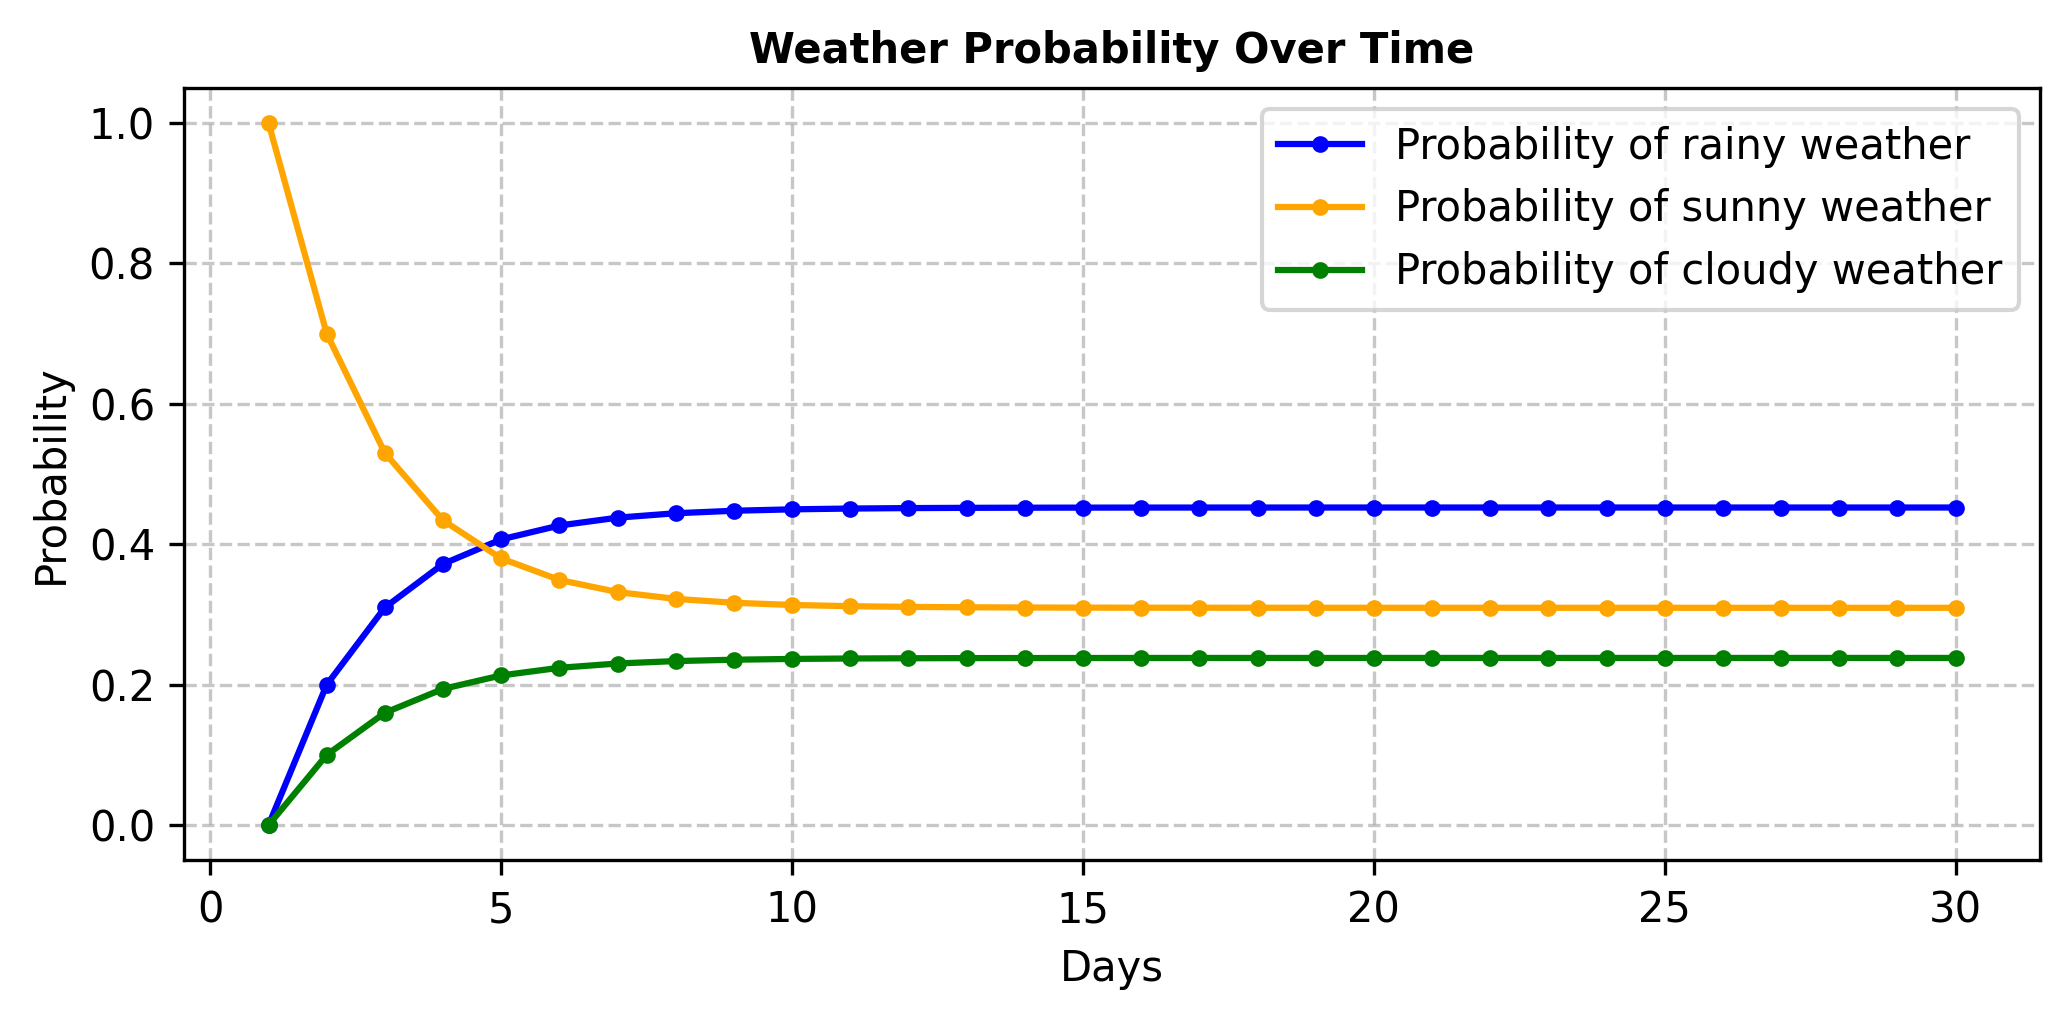

In [59]:
prob_arr = prob_dist(initial_state='sunny', desired_state= None, days=30, transition_matrix=P)
iters = np.arange(1,np.shape(prob_arr)[0]+1)
prob_rainy = prob_arr[:,0]
prob_sunny = prob_arr[:,1]
prob_cloudy = prob_arr[:,2]

plt.figure(figsize=(7,3.5), dpi=300) 
plt.plot(iters, prob_rainy, marker='o', color='blue', label='Probability of rainy weather', markersize=3)
plt.plot(iters, prob_sunny, marker='o', color='orange', label='Probability of sunny weather', markersize=3)
plt.plot(iters, prob_cloudy, marker='o', color='green', label='Probability of cloudy weather', markersize=3)
plt.title('Weather Probability Over Time', fontsize=10, fontweight = 'bold')
plt.xlabel('Days', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout() 
plt.show()

#### Steady-State Behavior of the Markov Chain

As we observe the behavior of the Markov chain over a long number of steps, we begin to notice that the probability distribution of the states reaches a point where it no longer changes with further iterations. This is referred to as the **steady-state behavior**. In this state, the system’s probabilities of being in each state stabilize, and no matter how many more steps are taken, the distribution remains the same.

This steady-state behavior is formally described by the **stationary distribution**, which is the probability distribution that does not change under the application of the transition matrix. In other words, when the Markov chain reaches its stationary distribution, the probabilities of transitioning from one state to another do not alter the overall distribution.

Mathematically, a stationary distribution $\pi$ satisfies the equation:

$$
\pi = \pi P
$$

where P is the transition matrix of the Markov chain. This means that the stationary distribution $\pi$ is a vector that, when multiplied by the transition matrix, produces the same vector $\pi$, indicating that the system is in equilibrium.
At this point, the system has essentially reached a point where it’s "stable," and the probabilities of being in each state are constant.
<br>
<br>
Now we’ll start from **different initial states** and observe if the probability distributions converge to the same values.


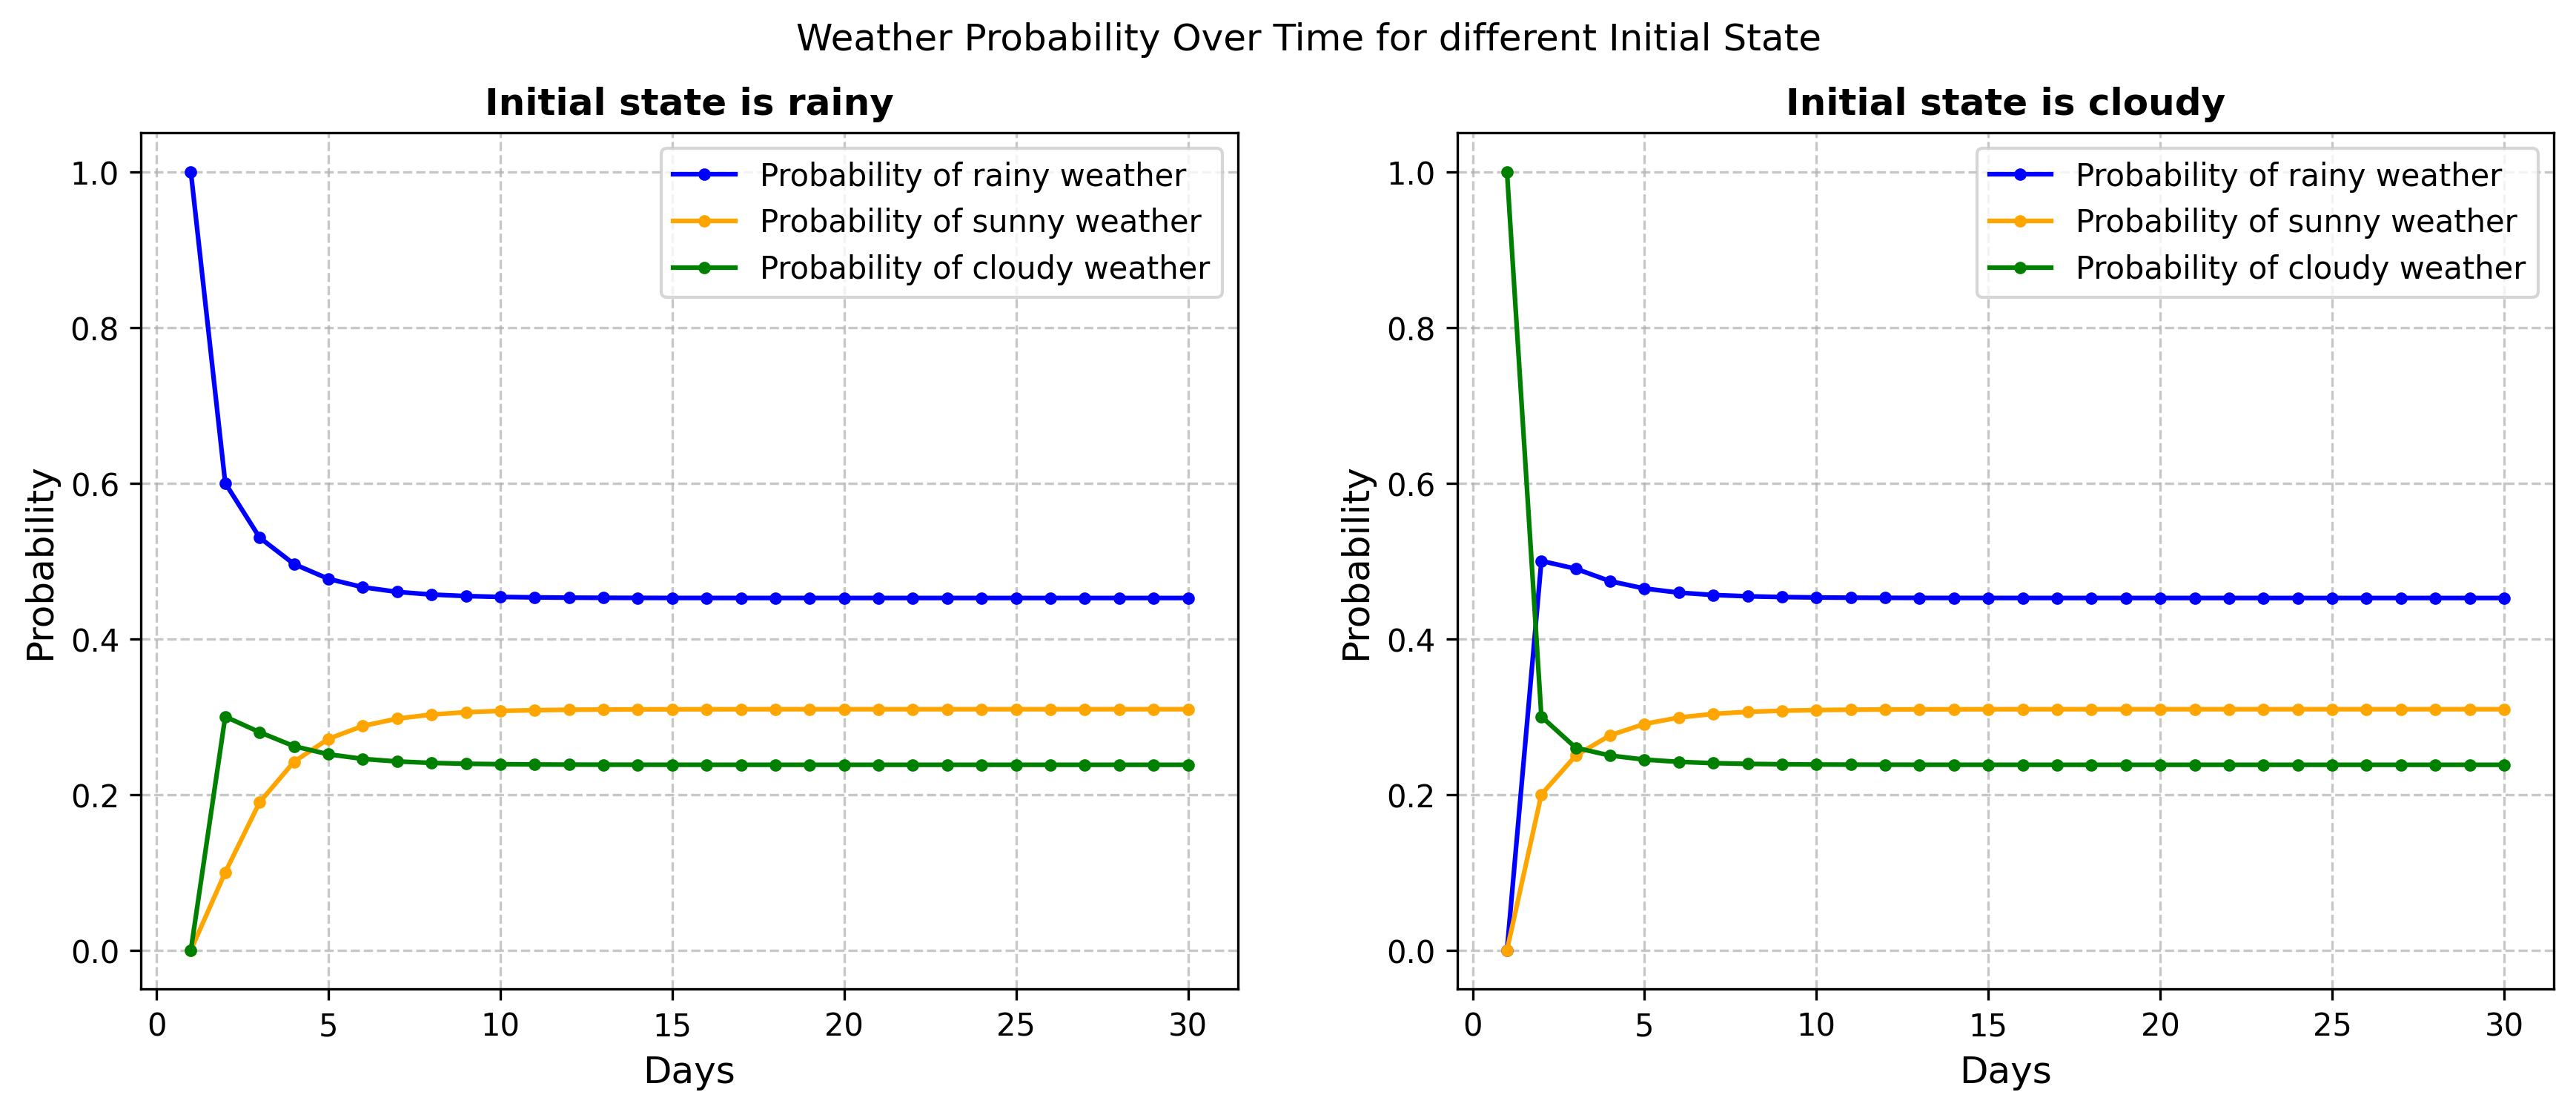

In [63]:
prob_arr_rainy = prob_dist(initial_state='rainy', desired_state= None, days=30, transition_matrix=P)
prob_arr_cloudy = prob_dist(initial_state='cloudy', desired_state= None, days=30, transition_matrix=P)

fig, ax = plt.subplots(1,2, figsize = (14,5), dpi = 300)

ax[0].plot(iters, prob_arr_rainy[:,0], marker='o', color='blue', label='Probability of rainy weather', markersize=3)
ax[0].plot(iters,  prob_arr_rainy[:,1], marker='o', color='orange', label='Probability of sunny weather', markersize=3)
ax[0].plot(iters, prob_arr_rainy[:,2], marker='o', color='green', label='Probability of cloudy weather', markersize=3)
ax[0].set_xlabel('Days', fontsize=12)
ax[0].set_ylabel('Probability', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].set_title('Initial state is rainy', fontsize = 12, fontweight = 'bold')
ax[0].legend()

ax[1].plot(iters, prob_arr_cloudy[:,0], marker='o', color='blue', label='Probability of rainy weather', markersize=3)
ax[1].plot(iters,  prob_arr_cloudy[:,1], marker='o', color='orange', label='Probability of sunny weather', markersize=3)
ax[1].plot(iters, prob_arr_cloudy[:,2], marker='o', color='green', label='Probability of cloudy weather', markersize=3)
ax[1].set_xlabel('Days', fontsize=12)
ax[1].set_ylabel('Probability', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].set_title('Initial state is cloudy', fontsize = 12, fontweight = 'bold')
ax[1].legend()

plt.suptitle('Weather Probability Over Time for different Initial State')
plt.show()


From the graphs above, we observe that, regardless of the initial state, the probability distribution converges to the same distribution, which is the **stationary distibution** of the Markov chain after a few number of steps.

For a Markov chain to have a unique stationary distribution, it must satisfy these two criteria:

1. **Irreducibility**: Every state must be reachable from every other state in a finite number of steps. This ensures that the chain does not have isolated parts or separate groups of states that it cannot transition between.

2. **Aperiodicity**: The chain must not cycle predictably between states in a fixed number of steps. In other words, there should be no integer $k > 1$ such that transitions occur only in multiples of $k$ steps. This allows the chain to mix and eventually settle into the stationary distribution without being locked into periodic cycles.

If a Markov chain is both irreducible and aperiodic, it is called **ergodic**. Ergodic chains have a unique stationary distribution, and the chain will converge to this distribution regardless of the initial state. 
<br>
*  However, in this particular example of weather prediction, the stationary distribution itself has limited real-life applicability, as weather transition probabilities often vary with time (e.g., based on seasons). Later, we’ll explore a different example where the stationary distribution has a more practical use.

#### n-step transition matrix
Let’s revisit the question we started with: determining the probability of experiencing rainy weather after 2 days, given that today’s weather is cloudy. As promised, we’ll now approach the solution using a different method.
**Solution 2**  
To solve this problem, let’s consider the process of calculating transition probabilities step-by-step. If we want to know the probability of moving from "cloudy" to "rainy" in **1 step**, we can simply look up this value directly in the transition matrix $P$. Here, $P_{12} = 0.3$, meaning there’s a 0.3 probability of going from "cloudy" to "rainy" in one step.

To find the probability of reaching rainy weather in **2 steps** from cloudy weather, we must account for all possible paths that take us to "rainy" in exactly two steps, summing the probabilities of each path.

The possible paths are:
1. cloudy $\to$ sunny $\to$ rainy
2. cloudy $\to$ cloudy $\to$ rainy
3. cloudy $\to$ rainy $\to$ rainy

Given the transition matrix $P$:
$$
P = \begin{pmatrix}
0.6 & 0.1 & 0.3 \\
0.2 & 0.7 & 0.1 \\
0.5 & 0.2 & 0.3 \\
\end{pmatrix}
$$

The probability of reaching "rainy" from "cloudy" in exactly 2 steps is:
$$
P_{21} \times P_{10} + P_{22} \times P_{20} + P_{20} \times P_{00} = 0.2 \times 0.2 + 0.3 \times 0.5 + 0.5 \times 0.6 = 0.49
$$
<br>
**Representing This Calculation with Vector Multiplication**
<br>

We can express this summing process more compactly as a **vector multiplication**. 
$$
\begin{bmatrix} P_{20} & P_{21} & P_{22} \end{bmatrix}
\begin{bmatrix} P_{00} \\ P_{10} \\ P_{20} \end{bmatrix} = P_{20} \cdot P_{00} + P_{21} \cdot P_{10} + P_{22} \cdot P_{20}
$$

This vector multiplication generalizes to **matrix multiplication**. The vector multiplication is actually finding the elements of the square of the transition matrix i.e elements of $P^2$. By squaring the transition matrix, $P^2$, each entry $(P^2)_{ij}$ in this matrix will give the probability of transitioning from state $i$ to state $j$ in exactly 2 steps. For example:
$$
(P^2)_{12} = \text{probability of reaching \bf {cloudy} from \bf {sunny} in 2 steps.}
$$

In general, the $(i, j)$-th entry of $P^n$ gives the probability of transitioning from state $i$ to state $j$ in exactly $n$ steps. This is a powerful tool for calculating multi-step transition probabilities in Markov chains.
<br>
In fact, without explicitly noting it, we have been applying the **Chapman-Kolmogorov theorem** .This theorem provides a foundation for computing multi-step transition probabilities in Markov chains. It states that for any two states $i$ and $j$ and any non-negative integers $r$ and $n$, the probability of moving from state $i$ to state $j$ in $n$ steps with intermediate stop in state $k$ after $r$ steps is given by:
$$
p_{ij}(n) = \sum_k p_{ik}(r) \cdot p_{kj}(n-r)
$$
where the sum is taken over all possible intermediate states $k$. This theorem reflects the fact that any multi-step transition can be broken down into the product of smaller, intermediate transitions, a principle that underlies the multiplication of transition matrices to find probabilities over multiple steps.


In [17]:
from numpy.linalg import matrix_power

def n_trans_matrix(initial_state, desired_state, days, transition_matrix,print_result = False):
    states = {'rainy':0, 'sunny':1, 'cloudy':2}
    n_step_mat = matrix_power(transition_matrix, days) ## Everywhere we have considered after 10 days to be 9th day
    if print_result:
        print(f'If today is {initial_state}, the probability of getting {desired_state} after {days} days is {n_step_mat[states[initial_state],states[desired_state]] * 100:.2f}%')
    else:
        return n_step_mat

P = np.array([[0.6, 0.1, 0.3],[0.2,0.7,0.1],[0.5,0.2,0.3]]) #transition_matrix

#Lets calculate and verify if the result matches with the previous example
n_trans_matrix(initial_state='sunny' ,desired_state='rainy', days=10, transition_matrix=P, print_result = True)

If today is sunny, the probability of getting rainy after 10 days is 45.09%


**Transition Matrix in Stationary Distribution**
<br>
When a Markov chain reaches its stationary distribution, the n-step transition matrix, $P^n$, converges to a matrix where each row is identical. This resulting matrix reflects the steady-state probabilities across all states. Essentially, every row of the matrix represents the stationary distribution itself, regardless of the starting state. This implies that as $n \to \infty$, the influence of the initial state fades, and the probability of being in each state stabilizes according to the stationary distribution.
<br>
Let’s now examine the form of the stationary matrix for this Markov chain, which will visually show how the probability distribution stabilizes.

In [118]:
print('The stationary matrix looks like : \n' ,n_trans_matrix(initial_state=None ,desired_state=None, days=40, transition_matrix=P))

The stationary matrix looks like : 
 [[0.45238095 0.30952381 0.23809524]
 [0.45238095 0.30952381 0.23809524]
 [0.45238095 0.30952381 0.23809524]]


Since every row is identical, the matrix reveals that the influence of the initial state has effectively vanished as $n \to \infty$. Each row's entries give the long-term probability of being in each state (rainy, sunny, cloudy), independent of where we started.

#### Google's PageRank Algorithm : Real Life example of stationary distribution of Markov Chain

**Google's PageRank Algorithm** uses a Markov chain to rank web pages. In this model, each page is a state, and links between pages represent transition probabilities. For example, with 4 pages (A, B, C, D), if A links to B and C then each link has an initial probability of 0.5. The algorithm also includes a probability for **random jumps** to any page, ensuring the chain is irreducible and converges to a steady-state distribution. The stationary distribution becomes the PageRank scores, with higher scores for pages with more or higher-quality inbound links.
<br>
Here is an example of how PageRank algorithm works
<br>
<center>
    <img src="Images/Pagerank.drawio.png" width="400" height="400">
</center>


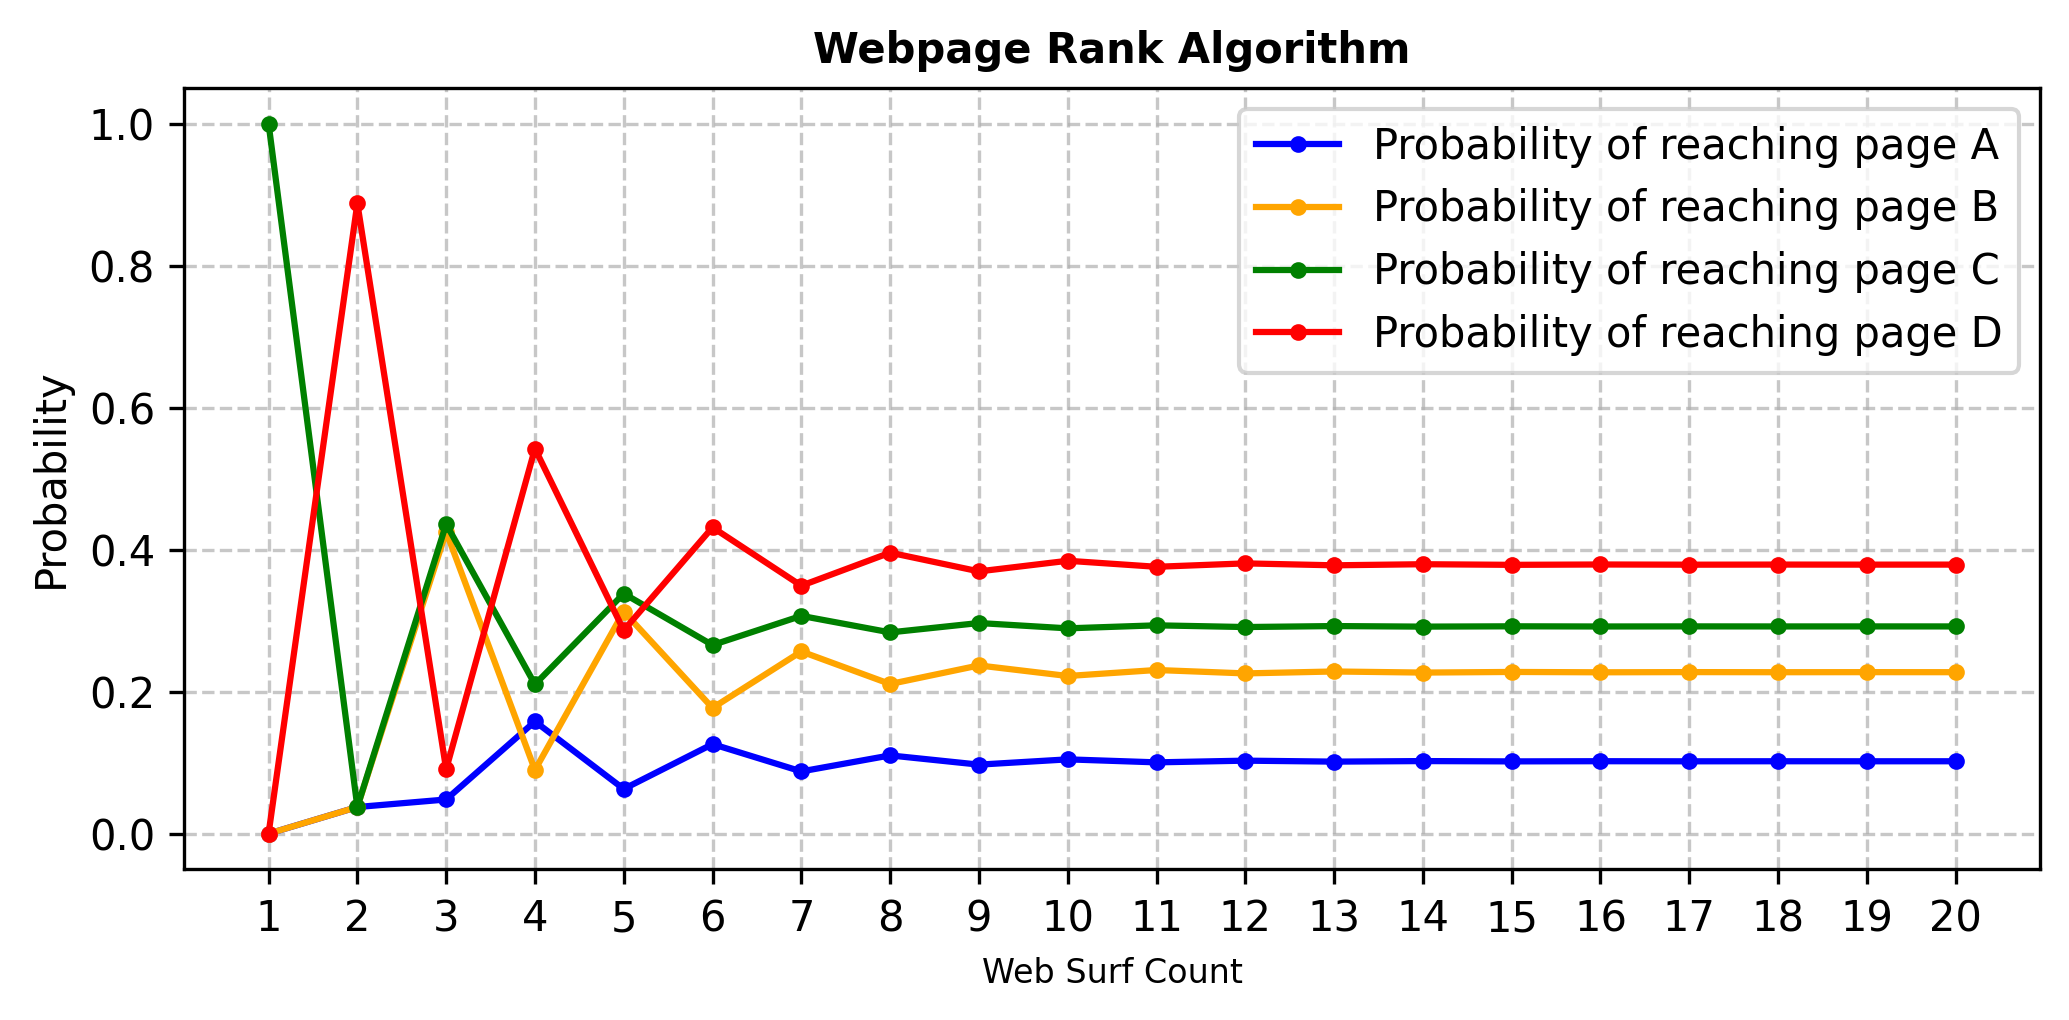

In [11]:
def page_rank(initial_page, steps, transition_matrix, jump_prob=0.15):
    web_pages = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
    num_pages = len(web_pages)
    state_vector = np.asarray([1 if i == web_pages[initial_page] else 0 for i in range(num_pages)])
    uniform_matrix = np.full((num_pages, num_pages), 1 / num_pages)
    adjusted_transition_matrix = (1 - jump_prob) * transition_matrix + jump_prob * uniform_matrix
    state_v_arr = np.zeros((steps, num_pages))
    state_v_arr[0] = state_vector
    
    for i in range(1, steps):
        state_vector = np.dot(state_vector, adjusted_transition_matrix)
        state_v_arr[i] = state_vector
    return state_v_arr

P = np.array([
    [0, 1/3, 1/3, 1/3],
    [1/3, 0, 1/3, 1/3],
    [0, 0, 0, 1],
    [0, 0.5, 0.5, 0]
])

prob_arr = page_rank(initial_page='C', steps=20, transition_matrix=P)
iters = np.arange(1,np.shape(prob_arr)[0]+1)
prob_A = prob_arr[:,0]
prob_B = prob_arr[:,1]
prob_C = prob_arr[:,2]
prob_D = prob_arr[:,3]

plt.figure(figsize=(7,3.5), dpi=300) 
plt.plot(iters, prob_A, marker='o', color='blue', label='Probability of reaching page A', markersize=3)
plt.plot(iters, prob_B, marker='o', color='orange', label='Probability of reaching page B', markersize=3)
plt.plot(iters, prob_C, marker='o', color='green', label='Probability of reaching page C', markersize=3)
plt.plot(iters, prob_D, marker='o', color='red', label='Probability of reaching page D', markersize=3)
plt.title('Webpage Rank Algorithm', fontsize=10, fontweight = 'bold')
plt.xlabel('Web Surf Count', fontsize=8)
plt.ylabel('Probability', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(int(min(iters)), int(max(iters)) + 1,1))
plt.legend()
plt.tight_layout() 
plt.show()

# Markov Chain Monte Carlo (MCMC)

With an understanding of both Markov Chains and Monte Carlo methods, we are now prepared to explore **Markov Chain Monte Carlo (MCMC)**. MCMC combines the principles of Markov Chains with the statistical sampling approach of Monte Carlo methods.

In many applications, especially in Bayesian statistics and high-dimensional integrals, it can be challenging or even impossible to sample directly from a desired probability distribution due to its complexity. MCMC provides a powerful tool to address this: we construct a Markov Chain with a stationary distribution that matches the target distribution we wish to sample from. By running the chain for a large number of steps, we eventually produce samples that represent the target distribution.

The idea behind MCMC is to construct a Markov Chain whose equilibrium behavior, or **stationary distribution**, matches the distribution from which we wish to sample. Once the chain is constructed, we can:
1. Run the chain for many steps, allowing it to converge toward its stationary distribution.
2. Use the states of the chain after convergence as samples from the desired distribution.

MCMC methods are especially valuable in Bayesian statistics and other fields where posterior distributions are analytically intractable but can be approximated by sampling.
In the following sections, we will delve into specific MCMC algorithms, such as the **Metropolis-Hastings** algorithm, which is widely used to sample from complex distributions. Through examples, we’ll explore how these algorithms apply MCMC principles to generate practical, efficient samples from target distributions.

### Metropolis-Hastings Algorithm

The **Metropolis-Hastings algorithm** is a widely used Markov Chain Monte Carlo (MCMC) method for sampling from complex probability distributions. It is particularly valuable when direct sampling from the target distribution is difficult, but sampling from a proposal distribution is feasible.
<br>
#### Key Concept
<br>
The goal of the Metropolis-Hastings algorithm is to generate a sequence of random samples that approximate a target probability distribution $ \pi(x) $. The algorithm achieves this by constructing a Markov chain whose stationary distribution is the target distribution $ \pi(x) $.

#### How It Works

The Metropolis-Hastings algorithm operates in the following steps:

1. **Initialization**: The algorithm starts with an initial state $ x_0 $, which is sampled from any arbitrary distribution.

2. **Proposal Step**: At each step $ t $, a new state $ y $ is proposed from a proposal distribution $ q(y | x_t) $, where $ x_t $ represents the current state.

3. **Acceptance Step**: The acceptance probability $ \alpha(x_t, y) $ is computed to determine whether the proposed state $ y $ should be accepted or rejected. The acceptance probability is given by:

   $$
   \alpha(x_t, y) = \min \left( 1, \frac{\pi(y) \cdot q(x_t | y)}{\pi(x_t) \cdot q(y | x_t)} \right)
   $$

   - $ \pi(x_t) $ and $ \pi(y) $ are the target probability densities at the current state and the proposed state, respectively.
   - $ q(y | x_t) $ and $ q(x_t | y) $ are the proposal densities at the current and proposed states, respectively and their ratio is known as hasting's ratio.

4. **Transition**:
   - If the proposed state $ y $ is accepted (with probability $ \alpha(x_t, y) $), the next state $ x_{t+1} $ is set to $ y $.
   - If the proposed state $ y $ is rejected, the current state is retained, i.e., $ x_{t+1} = x_t $.

5. **Drawing Samples**: After the chain converges to the target distribution, meaningful samples can be generated using this algorithm

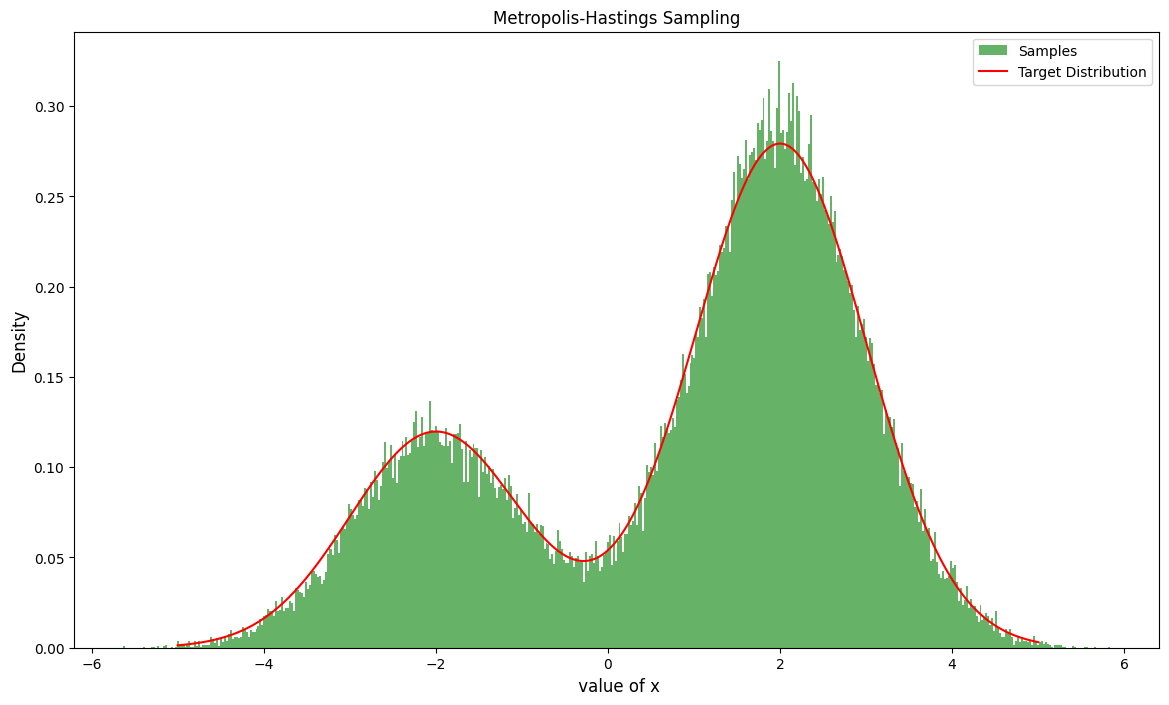

In [32]:
def target_distribution(x, w1=0.3, w2=0.7, mu1=-2, sigma1=1, mu2=2, sigma2=1): #bimodal gaussian
    func1 = w1 * np.exp(-0.5 * ((x - mu1) ** 2) / sigma1**2) / (sigma1 * np.sqrt(2 * np.pi))
    func2= w2 * np.exp(-0.5 * ((x - mu2) ** 2) / sigma2**2) / (sigma2 * np.sqrt(2 * np.pi))
    return func1 + func2
    
def proposal_distribution(x_current, sigma):
    x_proposed = np.random.normal(x_current, sigma)    
    return x_proposed

def hastings_likelihood(x, x_current, sigma):
    likelihood = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - x_current)**2 / sigma**2))
    return likelihood

    
def metropolis_hastings(target_dist, proposal_dist, initial_state, n_iterations, proposal_sigma=0.4):
    samples = []
    x_current = initial_state
    
    for _ in range(n_iterations):
        x_proposed = proposal_dist(x_current, proposal_sigma)
        acceptance_ratio = (target_dist(x_proposed) * hastings_likelihood(x_current,x_proposed,proposal_sigma)) / (target_dist(x_current) * hastings_likelihood(x_proposed,x_current,proposal_sigma))
        
        'acceptance ratio if the proposal distribution is uniform'
        #acceptance_ratio = (target_dist(x_proposed))  / (target_dist(x_current))
        if np.random.rand() < min(1, acceptance_ratio):
            x_current = x_proposed
        
        samples.append(x_current)
    
    return np.array(samples)

n_iterations = 100000
initial_state = 0.0
proposal_sigma = 0.4  # Controls the "step size" for proposals

samples = metropolis_hastings(target_distribution, proposal_distribution, initial_state, n_iterations, proposal_sigma)

plt.figure(figsize=(14, 8))
plt.hist(samples, bins=500, density=True, alpha=0.6, color='g', label="Samples")
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x), 'r', label="Target Distribution")
plt.title("Metropolis-Hastings Sampling")
plt.xlabel(" value of x", fontsize = 12)
plt.ylabel("Density",fontsize = 12)
plt.legend()
plt.show()


The Metropolis-Hastings algorithm has successfully generated samples that closely match the target bimodal distribution, as demonstrated by the histogram of the sampled values aligning with the true distribution. This indicates that the Markov chain has converged to the target distribution over time.

#### Sampling After Convergence

In Metropolis-Hastings (and other MCMC methods), it is crucial to **sample after the chain has converged** to the target distribution. The initial samples, before the chain has reached its stationary state, can be biased by the starting point and do not accurately reflect the target distribution. Therefore, a **burn-in period** is often used, during which the initial iterations are discarded. After the burn-in period, the chain is considered to have **converged**, and the remaining samples are drawn from the target distribution, making them valid for statistical analysis or inference.

